# Python examples


## Creates

- createUser
- createMarket
- createTrade

### Create user

Creates a new user. Returns signature and verify keys.

~~~~
baseurl = 'https://https://blocmarket.herokuapp.com/'
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example return as json:

~~~~
{'signingKey_hex': '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477',
 'traderId': '1',
 'verifyKey_hex': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}
~~~~
        
### Create/update market

Creates/updates a market. Returns True and market details if successful. 

Specify:
- Market root and branch id
- Minimum and maximum outcomes
- Trader Id
- Sign and verify keys

Note that sending the private key is a terrible idea. In production signing is done on client side.

~~~~
sk = '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477'
vk = 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'
tId = 2

content_makemarket = {"signingKey_hex": sk,
                    "traderId": tId, 
                    "verifyKey_hex": vk,
                    "marketRootId": 1, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
~~~~

Example return as json:

~~~~
{'checks': 'True',
 'marketBranchId': 1,
 'marketMax': 1,
 'marketMin': 0,
 'marketRootId': 1,
 'traderId': '2'}
~~~~
    
### Create trade

Create a trade. Returns True and trade details if successful.

Specify:

- Trader Id
- Market Id
- Price
- Quantity
- Sign and verify keys

~~~~
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": tId,
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}

response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
~~~~

Example return as json:
~~~~
{'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': '2'}
~~~~

## Views

- viewMarketBounds
- viewOrderBook
- viewOpenTrades
- viewMatchedTrades

### View markets

~~~~
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":2,"2":3,"3":4},"marketRootId":{"0":1,"1":2,"2":3,"3":4},"marketBranchId":{"0":1,"1":1,"2":1,"3":1},"marketMin":{"0":0.0,"1":0.0,"2":0.0,"3":0.0},"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7}}'
~~~~

### View full order book

~~~~
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1,"2":1},"price":{"0":0.55,"1":0.55,"2":0.55},"quantity":{"0":1.0,"1":-1.0,"2":-1.0},"traderId":{"0":1,"1":1,"2":1},"iMatched":{"0":true,"1":true,"2":true},"timeStampUTC":{"0":1547976585838,"1":1547976602766,"2":1547976613155}}'
~~~~

### View open trades

~~~~
url = baseurl+'viewOpenTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

~~~~
'{"marketId":{"12":1,"15":1,"18":1,"21":1,"24":1},"price":{"12":0.43,"15":0.43,"18":0.43,"21":0.43,"24":0.43},"quantity":{"12":-1.0,"15":-1.0,"18":-1.0,"21":-1.0,"24":-1.0},"traderId":{"12":1,"15":1,"18":1,"21":1,"24":1},"timeStampUTC":{"12":1547976742476,"15":1547976750344,"18":1547976758683,"21":1547976768968,"24":1547976775537}}'
~~~~

### View matched trades

~~~~
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.43,"1":0.55},"quantity":{"0":0.0,"1":0.0},"traderId":{"0":1,"1":1}}'

~~~~

### View trader summary

A view joining order book and marketTable for a particular trader.

~~~~
url = baseurl+'viewTradeSummary'
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.8,"1":0.5},"quantity":{"0":-1.0,"1":-1.0},"traderId":{"0":2,"1":2},"iMatched":{"0":false,"1":true},"timeStampUTC":{"0":1547982939316,"1":1547982938964},"marketMin":{"0":0.0,"1":0.0},"marketMax":{"0":1.0,"1":1.0}}'
~~~~


# Python demonstration

In [1167]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Running flask app from powershell
# $env:FLASK_APP = "api"
# $env:FLASK_ENV = "development"
# flask run

# Running flask from terminal on OSX
# export FLASK_APP=api
# export FLASK_ENV=development
# flask run

# Running with gunicorn (heroku, digitalocean, etc):
# Procfile >
# web: gunicorn wsgi --log-file -
# wsgi.py >
# from api import app as application
#
#if __name__ == "__main__":
#    application.run()

# https://devcenter.heroku.com/articles/getting-started-with-python
# https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-14-04


In [1381]:
#  baseurl = 'https://vast-depths-89393.herokuapp.com/'
# baseurl = 'https://glacial-hollows-90395.herokuapp.com/'
baseurl = 'https://blocmarket.herokuapp.com/'
#baseurl = 'http://127.0.0.1:5000/'
# baseurl = 'http://127.0.0.1:7000/'

In [1382]:
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1383]:
response.json()

{'signingKey_hex': '4eda0ffb885c1e83733215677221901a541ab5b4876c97926adbccf426edbd12',
 'traderId': '1',
 'verifyKey_hex': '82747e695804334bfd0d89f0b318b8238d255b5c9ba2e7d9de5d7285b658974f'}

In [1384]:
url = baseurl + 'createMarket'

mkRtId = 1
mkId=1
# copy from response
sk = response.json()['signingKey_hex']
vk = response.json()['verifyKey_hex']
tId = response.json()['traderId']

In [1385]:
content_makemarket = {"signingKey_hex": sk,
                    "traderId": tId, 
                    "verifyKey_hex": vk,
                    "marketRootId": mkRtId, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)

In [1386]:
response.json()

{'checks': 'True',
 'marketBranchId': 1,
 'marketMax': 1,
 'marketMin': 0,
 'marketRootId': 1,
 'traderId': '1'}

In [1387]:
pd.DataFrame(response.json(), index=[0])

,checks,marketBranchId,marketMax,marketMin,marketRootId,traderId
0,True,1,1,0,1,1


In [1388]:
# Create a trade
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": tId,
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
# Post trade
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [1389]:
response.json()

{'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': '1'}

In [1390]:
# View json response
pd.DataFrame(response.json(), index=[0])


,checks,marketId,price,quantity,traderId
0,True,1,0.55,1,1


In [1391]:
# Create a matched trade
url = baseurl+'createTrade'
content_maketrade['quantity'] = -1
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [1392]:
response.json()

{'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': '1'}

In [1393]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 5.469158172607422 seconds.
matched trade: 1 in 4.924421072006226 seconds.
matched trade: 2 in 4.175058126449585 seconds.
matched trade: 3 in 4.42815375328064 seconds.
matched trade: 4 in 5.425246953964233 seconds.


In [1332]:
url = baseurl+'createMarket'

for i in range(4):
    t = time.time()

    content_makemarket = {"signingKey_hex": sk,
      "traderId": int(tId), "verifyKey_hex": vk,
      "marketRootId": i+1, "marketBranchId": 1, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create market ' +str(i+1))
    

failed to create market 1
failed to create market 2
failed to create market 3
failed to create market 4


In [1333]:
response.json()

{'checks': 'False',
 'marketBranchId': 1,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 4,
 'traderId': 3}

In [1394]:
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)


In [1395]:
a = pd.read_json(response.json())
a

,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,1,1,0,1


In [1396]:
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1397]:
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC
0,1,0.55,1,1,True,2019-01-24 10:25:28.334
1,1,0.55,-1,1,True,2019-01-24 10:25:32.224
10,1,0.55,-1,1,True,2019-01-24 10:26:03.057
11,1,0.55,1,1,True,2019-01-24 10:26:06.261
2,1,0.55,-1,1,True,2019-01-24 10:25:45.276
3,1,0.55,1,1,True,2019-01-24 10:25:47.363
4,1,0.55,-1,1,True,2019-01-24 10:25:50.167
5,1,0.55,1,1,True,2019-01-24 10:25:52.228
6,1,0.55,-1,1,True,2019-01-24 10:25:54.373
7,1,0.55,1,1,True,2019-01-24 10:25:56.391


In [1398]:
# Create many unmatched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    content_maketrade['price'] = 0.43
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('unmatched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


unmatched trade: 0 in 2.8112430572509766 seconds.
unmatched trade: 1 in 3.9325921535491943 seconds.
unmatched trade: 2 in 2.678577184677124 seconds.
unmatched trade: 3 in 2.5374350547790527 seconds.
unmatched trade: 4 in 2.5730528831481934 seconds.


In [1399]:
response.json()

{'checks': 'True',
 'marketId': 1,
 'price': 0.43,
 'quantity': -1,
 'traderId': '1'}

In [1400]:
url = baseurl+'viewOpenTrades'

content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1401]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,timeStampUTC
12,1,0.43,-1,1,2019-01-24 10:26:41.430
13,1,0.43,-1,1,2019-01-24 10:26:45.352
14,1,0.43,-1,1,2019-01-24 10:26:48.094
15,1,0.43,-1,1,2019-01-24 10:26:50.636
16,1,0.43,-1,1,2019-01-24 10:26:53.215


In [1402]:
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1403]:
pd.read_json(response.json())

,marketId,price,quantity,traderId
0,1,0.55,0,1


In [1404]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 4.462773084640503 seconds.
matched trade: 1 in 4.330605983734131 seconds.
matched trade: 2 in 5.02333402633667 seconds.
matched trade: 3 in 6.499006986618042 seconds.
matched trade: 4 in 4.570878982543945 seconds.


In [1347]:
url = baseurl+'viewTradeSummary'
content = {'traderId': 3}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1348]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.55,1,3,True,2019-01-23 10:58:07.476,0,1,-0.55,0.45
1,1,0.55,-1,3,True,2019-01-23 10:58:09.412,0,1,0.55,-0.45
10,1,0.55,-1,3,True,2019-01-23 10:58:24.786,0,1,0.55,-0.45
11,1,0.55,1,3,True,2019-01-23 10:58:26.084,0,1,-0.55,0.45
12,1,0.43,-1,3,False,2019-01-23 10:58:51.075,0,1,0.43,-0.57
13,1,0.43,-1,3,True,2019-01-23 10:58:32.827,0,1,0.43,-0.57
14,1,0.43,1,3,True,2019-01-23 10:58:52.354,0,1,-0.43,0.57
15,1,0.43,-1,3,False,2019-01-23 10:58:53.641,0,1,0.43,-0.57
16,1,0.43,-1,3,True,2019-01-23 10:58:34.138,0,1,0.43,-0.57
17,1,0.43,1,3,True,2019-01-23 10:58:54.901,0,1,-0.43,0.57


In [1360]:
url = baseurl+'getSignedUTCTimestamp'
content = {}
response = requests.get(url, data=json.dumps(content), headers=headers)


In [1362]:
response.json()

{'timeStampUTC': '2019-01-23 11:11:50.314354',
 'timeStampUTCSignature': 'b\'\\x1ele\\x92\\xa2\\xa4\\xbe\\xe0\\xa0\\xa4\\n\\x02RB\\xfd\\x85\\xb2}\\xf1\\x19\\x12\\x1aP\\xda\\xd1(\\xd2?D\\xfb|\\r\\xe5"\\xdc\\x8c\\xa1u\\x05\\x99*]\\x10\\xe3\\xba\\xe4\\xa5\\xa4\\x14\\x9a\\x08\\xcd@\\xf5\\xbadL3\\xf4\\xb3\\xf3\\xbd=\\x0e\'',
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}

In [1314]:
# A simple bot
url = baseurl+'createTrade'
content_maketrade['quantity'] = 1
B = 0
for i in range(10):
    # Create bounded random betwen zero and one
    dW = np.random.random()/10
    if B >0.9:
        B -= abs(dW)
    elif B <0.1:
        B += abs(dW)
    else:
        B = B + dW
    B = min(max(B, 0),1)
    # Make a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Make an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    time.sleep(1)
    # Remove a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =-1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Remove an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = 1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('Increment ' + str(i) + ' at ' + str(time.time()))

Increment 0 at 1548190421.440692
Increment 1 at 1548190446.831512
Increment 2 at 1548190469.24342
Increment 3 at 1548190497.4039629
Increment 4 at 1548190524.798018
Increment 5 at 1548190556.123942
Increment 6 at 1548190583.8816462
Increment 7 at 1548190610.6431239
Increment 8 at 1548190633.496346
Increment 9 at 1548190659.3040938


In [1280]:

url = baseurl+'viewTradeSummary'
content = {'traderId': tId}
response = requests.post(url, data=json.dumps(content), headers=headers)
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.550000,1,2,True,2019-01-22 09:43:06.198,0,0.7,-0.550000,0.150000
1,1,0.550000,-1,2,True,2019-01-22 09:43:21.332,0,0.7,0.550000,-0.150000
10,1,0.550000,-1,2,True,2019-01-22 09:45:48.227,0,0.7,0.550000,-0.150000
11,1,0.550000,1,2,True,2019-01-22 09:45:58.348,0,0.7,-0.550000,0.150000
12,1,0.430000,-1,2,False,2019-01-22 09:48:04.182,0,0.7,0.430000,-0.270000
13,1,0.430000,-1,2,False,2019-01-22 09:48:14.055,0,0.7,0.430000,-0.270000
14,1,0.430000,-1,2,False,2019-01-22 09:48:33.065,0,0.7,0.430000,-0.270000
15,1,0.430000,-1,2,False,2019-01-22 09:48:58.885,0,0.7,0.430000,-0.270000
16,1,0.430000,-1,2,False,2019-01-22 09:49:13.755,0,0.7,0.430000,-0.270000
17,1,0.430000,-1,2,False,2019-01-22 09:49:47.155,0,0.7,0.430000,-0.270000


In [1315]:
a = a.set_index(a['timeStampUTC'])
a



,marketId,price,quantity,traderId,iMatched,timeStampUTC
timeStampUTC,,,,,,
2019-01-22 09:26:52.691,1,0.550000,1,1,True,2019-01-22 09:26:52.691
2019-01-22 09:27:16.479,1,0.550000,-1,1,True,2019-01-22 09:27:16.479
2019-01-22 09:28:50.463,1,0.550000,-1,1,True,2019-01-22 09:28:50.463
2019-01-22 09:28:59.024,1,0.550000,1,1,True,2019-01-22 09:28:59.024
2019-01-22 09:32:48.590,1,0.430000,-1,1,False,2019-01-22 09:32:48.590
2019-01-22 09:43:06.198,1,0.550000,1,2,True,2019-01-22 09:43:06.198
2019-01-22 09:43:21.332,1,0.550000,-1,2,True,2019-01-22 09:43:21.332
2019-01-22 09:44:00.643,1,0.550000,-1,2,True,2019-01-22 09:44:00.643
2019-01-22 09:44:15.652,1,0.550000,1,2,True,2019-01-22 09:44:15.652


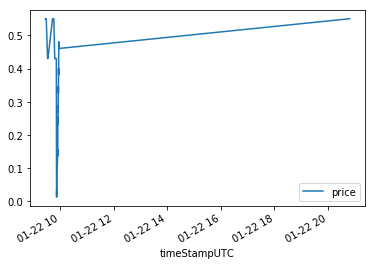

In [1316]:
plt.figure(); a['price'].plot(); plt.legend(loc='best')


# Curl examples



## Create user

~~~~
curl --header "Content-Type: application/json" -X POST http://127.0.0.1:7000/createUser
~~~~
        
## Create market

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketRootId": 1, 
"marketBranchId": 5, 
"marketMin": 0, 
"marketMax": 1}' 
--header "Content-Type: application/json" -X POST http://localhost:7000/createMarket
~~~~
    
## Create trade

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketId": 1,
"price": 0.1212,
"quantity": 1}' --header "Content-Type: application/json" -X POST http://localhost:7000/createTrade

~~~~
        
## View order book (output to file)

~~~~
curl --header "Content-Type: application/json" -X POST http://127.0.0.1:7000/viewOrderBook --output ob.txt
~~~~    
        
Also can load json from file with something like 
~~~~ 
curl -d "@data.json" -X POST http://localhost:3000/data 
~~~~

Matlab will (probably?) run these with 
~~~~
[A, curlout] = system('curlstring')
~~~~

    

# Setup for release

- Get extra database rows on Heroku
- Single 